<h1>National Fuel Moisture Database</h1>
<hr>
W. Matt Jolly<br>
USFS, RMRS, Missoula Fire Sciences Laboratory<br>
william.jolly@usda.gov<br>
10 June 2022

In [4]:
import pandas as pd
import geopandas as gpd

In [5]:
# Read in the three NFMD data tables 
df_dat = pd.read_csv('./Tbldata.txt',low_memory=False)
df_site = pd.read_csv('./Tblsites.txt')
df_fuel = pd.read_csv('./Tblfuels.txt')

In [6]:
# Make the date readable by python
df_dat['DateTime']=pd.to_datetime(df_dat['date'].astype(str) + " 13", format='%Y-%m-%d %H')
df_merge1 = df_dat.merge(df_fuel,on='fuel')
df_merge2 = df_merge1.merge(df_site, on =['gacc','site'])
df_merge2.rename(columns=lambda x: x.strip(), inplace=True)
# Fix the coordinates so they can be plotted on a map
latsplit = df_merge2['lat'].str.split(pat = '-', expand = True).astype(float)
lonsplit = df_merge2['lng'].str.split(pat = '-', expand = True).astype(float)
df_merge2['Latitude'] = latsplit[0] + ((latsplit[1]+(latsplit[2]/60))/60)
df_merge2['Longitude'] = (lonsplit[0] + ((lonsplit[1]+(lonsplit[2]/60))/60)) * -1
df_merge2.drop(['ID_x','grup_x','state_x','old_fuel','ID_y','states'],axis=1,inplace=True)
df_lfm = df_merge2
cols=df_lfm.columns.tolist()
# Reorder the columns to make the dataframe easier to read
newcols = ['gacc', 'grup_y', 'site','Latitude','Longitude', 'fuel', 'date', 'DateTime',
 'percent', 'category', 'scientific_name', 'ID', 'date_created', 'fuel_model', 'fuel_loading',
 'slope', 'aspect', 'default_end_month', 'default_beg_month', 'remarks', 'raws_id', 'state_y', 'active',
 'jurisdiction', 'raws', 'elevation', 'lng', 'lat']
# Make it a GeoPandas dataframe for plotting on a map

df_lfm = df_lfm[newcols]

In [7]:
# Convert Pandas to Geopandas to plot the map of site locations
gdf_lfm = gpd.GeoDataFrame(df_lfm, geometry=gpd.points_from_xy(df_lfm.Longitude, df_lfm.Latitude))

In [8]:
# Select the data for California GACCs
gdf_lfm = gdf_lfm[(gdf_lfm['gacc'] == 'NOCC') | (gdf_lfm['gacc'] == 'SOCC')]
gdf_lfm['gacc'].unique()

array(['NOCC', 'SOCC'], dtype=object)

<AxesSubplot:>

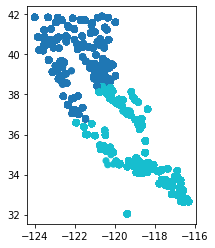

In [9]:
# Plot the sample site locations 
gdf_lfm.plot(column='gacc')

In [10]:
# Write a final, clean CSV file for use outside Python
df_lfm = pd.DataFrame(gdf_lfm.drop(columns='geometry'))